In [1]:
# from hezar import Model
from hazm import *

import nltk
from nltk.corpus import stopwords

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from collections import Counter

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
import gensim

import os
# from glob import glob
# import re
# # import cv2
# import pytesseract
# from tqdm import tqdm
# from PyPDF2 import PdfReader
from docx import Document

In [2]:
def save_2_file(name,items):
    with open(name, "a",encoding="utf-8") as f:
        for item in items:
            f.write("%s\n" % item)

In [3]:
def read_file(name):
    with open(name, "r", encoding="utf-8") as f:
        content = f.readlines()
    return "".join(content)


In [4]:
def read_word_document(file_path):
    doc = Document(file_path)
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)
    return '\n'.join(full_text)

In [9]:
with open("Dr_Namdarian.txt",'w',encoding='utf-8') as f:
        f.write(text)

In [8]:
single_string = read_file("Dr_Namdarian.txt")

### all files of the saved model must be moved to a single folder

In [5]:
digi_C_data = pd.read_csv("sentiment_digikala_data.csv")

In [6]:
digi_C_data.head()

,comment,recommend
0,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,recommended
1,همه چیز در رابطه با ظاهر این گوشی بسیار خوب اس...,no_idea
2,اگر ظرفیتش براتون کافیه حتما بخرید._x000D_\nیه...,no_idea
3,سلام دوستان،،_x000D_\nمنم مثه بعضی از دوستان ق...,recommended
4,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...,recommended


In [8]:
digi_C_data_list = digi_C_data["comment"].tolist()

In [9]:
len(digi_C_data_list)

18818

In [11]:
semi_cleaned_strings = []
for single_string in digi_C_data_list:
    single_string = single_string.replace("\n","")
    single_string = single_string.replace("..","")
    single_string = single_string.replace("  ","")
    single_string = single_string.replace("\x0c","")
    for i in range(50):
        single_string = single_string.replace("\n{}".format(i),"")
    semi_cleaned_strings.append(single_string)

In [12]:
semi_cleaned_strings[:3]

['سلام، قبل اینکه نظرم رو بگم میخواستم به یک موضوع مهم اشاره کنم که نظراتی که ما برای کالاها ثبت میکنیم خیلی مهم هستن، چون بسیاری از مردم عزیز با استناد به این نظرات یک کالا رو خریداری میکنن. پس بهتره ک نظر غیر کارشناسی و الکی ندیم._x000D__x000D_من ۲سال این پاور بانک رو دارم، برای ۲نفر اشنا هم خریدم، پیشنهاد ویژه بود خریدم، واقعا از هر نظر عالیه، بعد گذشت ۲سال هنوزم ۵بار ایفون se رو شارژ میکنه، در خصوص زمان شارژ گفته بودن دوستان، اگر با کابل خود پاور شارژ کنید حدود ۶ساعت فول میشه، اما اگر هر کابل دیگه ای وصل کنید ۱۲تا۱۸ ساعت طول میکشه._x000D_همزمان با این پاور یک adata 10000 هم برای همسرم خریدم ، اونم خوب درومد ولی حدود ۳۰\u200e٪ افت داشته و کمتر بازدهی شارژ داره._x000D__x000D_طبق تجربه من و اطرافیانم ک شیائومی داشتن، اگر کالایی ک میخرید اصل باشه(فیک زیاد داره) واقعا شیائومی حرف اول و میزنه، _x000D_anker هم برند خیلی خوب ولی گرونه، هفته پیش از دیجی خریدم a1214 اونم واقعا سبک و عالیه و بازدهی بالایی داره.(۲خروجی هوشمند داره،مجموع ۳امپر میده،حداکثر یک خروجی ۲.۴ میده)_x000D__x000D_ببخشید 

In [13]:
normalizer = Normalizer()

In [30]:
normalized_strings = []
for single_string in digi_C_data_list:
    cleaned_fa_text = normalizer.normalize(single_string).replace("\u200c","").replace("\u200e","").replace("D_\n","").replace("_x","")
    normalized_strings.append(cleaned_fa_text)

In [31]:
len(normalized_strings)

18818

In [32]:
normalized_strings[:3]

['سلام، قبل اینکه نظرم رو بگم میخواستم به یک موضوع مهم اشاره کنم که نظراتی که ما برای کالاها ثبت میکنیم خیلی مهم هستن، چون بسیاری از مردم عزیز با استناد به این نظرات یک کالا رو خریداری میکنن. پس بهتره ک نظر غیر کارشناسی و الکی ندیم.  ۰۰۰  ۰۰۰ من ۲ سال این پاور بانک رو دارم، برای ۲ نفر اشنا هم خریدم، پیشنهاد ویژه بود خریدم، واقعا از هر نظر عالیه، بعد گذشت ۲ سال هنوزم ۵ بار ایفون se رو شارژ میکنه، در خصوص زمان شارژ گفته بودن دوستان، اگر با کابل خود پاور شارژ کنید حدود ۶ ساعت فول میشه، اما اگر هر کابل دیگهای وصل کنید ۱۲ تا ۱۸ ساعت طول میکشه.  ۰۰۰ همزمان با این پاور یک adata ۱۰۰۰۰ هم برای همسرم خریدم، اونم خوب درومد ولی حدود ۳۰ ٪ افت داشته و کمتر بازدهی شارژ داره.  ۰۰۰  ۰۰۰ طبق تجربه من و اطرافیانم ک شیائومی داشتن، اگر کالایی ک میخرید اصل باشه (فیک زیاد داره) واقعا شیائومی حرف اول و میزنه،  ۰۰۰ anker هم برند خیلی خوب ولی گرونه، هفته پیش از دیجی خریدم a ۱۲۱۴ اونم واقعا سبک و عالیه و بازدهی بالایی داره. (۲ خروجی هوشمند داره، مجموع ۳ امپر میده، حداکثر یک خروجی ۲ ٫ ۴ میده)  ۰۰۰  ۰۰۰ ببخشید طول

In [34]:
save_2_file("digikala_comments.txt",normalized_strings)

In [35]:
single_string = read_file("digikala_comments.txt")

In [36]:
single_string[:200]

'سلام، قبل اینکه نظرم رو بگم میخواستم به یک موضوع مهم اشاره کنم که نظراتی که ما برای کالاها ثبت میکنیم خیلی مهم هستن، چون بسیاری از مردم عزیز با استناد به این نظرات یک کالا رو خریداری میکنن. پس بهتره ک'

In [37]:
sentences = sent_tokenize(single_string)

In [38]:
len(sentences)

23964

In [39]:
sentences[:2]

['سلام، قبل اینکه نظرم رو بگم میخواستم به یک موضوع مهم اشاره کنم که نظراتی که ما برای کالاها ثبت میکنیم خیلی مهم هستن، چون بسیاری از مردم عزیز با استناد به این نظرات یک کالا رو خریداری میکنن.',
 'پس بهتره ک نظر غیر کارشناسی و الکی ندیم.']

In [40]:
sent_token = []
for sent in sentences:
    sent_token.append(word_tokenize(sent))

In [41]:
len(sent_token[0])

42

In [42]:
sent_token[1]

['پس', 'بهتره', 'ک', 'نظر', 'غیر', 'کارشناسی', 'و', 'الکی', 'ندیم', '.']

# For some wordsimilarity

In [44]:
# @title  Load Dataset from `nltk`
# No critical warnings, so we suppress it
import warnings
warnings.simplefilter("ignore")

nltk.download('punkt')
# nltk.download('brown')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaveh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
sent_token[0]

['سلام',
 '،',
 'قبل',
 'اینکه',
 'نظرم',
 'رو',
 'بگم',
 'میخواستم',
 'به',
 'یک',
 'موضوع',
 'مهم',
 'اشاره',
 'کنم',
 'که',
 'نظراتی',
 'که',
 'ما',
 'برای',
 'کالاها',
 'ثبت',
 'میکنیم',
 'خیلی',
 'مهم',
 'هستن',
 '،',
 'چون',
 'بسیاری',
 'از',
 'مردم',
 'عزیز',
 'با',
 'استناد',
 'به',
 'این',
 'نظرات',
 'یک',
 'کالا',
 'رو',
 'خریداری',
 'میکنن',
 '.']

In [46]:
len(sent_token)

23964

In [47]:
# Preprocess and filter out short words
preprocessed_data_sentences = []
for sentence in sent_token:
  # Remove elements containing only digits and low in length
  filtered_tokens = [item for item in sentence if not item.isdigit() and len(item)>3]
  preprocessed_data_sentences.append(filtered_tokens)

In [48]:
preprocessed_data_sentences[:2]

[['سلام',
  'اینکه',
  'نظرم',
  'میخواستم',
  'موضوع',
  'اشاره',
  'نظراتی',
  'برای',
  'کالاها',
  'میکنیم',
  'خیلی',
  'هستن',
  'بسیاری',
  'مردم',
  'عزیز',
  'استناد',
  'نظرات',
  'کالا',
  'خریداری',
  'میکنن'],
 ['بهتره', 'کارشناسی', 'الکی', 'ندیم']]

In [49]:
word_list = []
word_list.extend(token for sent in preprocessed_data_sentences for token in sent) #for sent in 

In [50]:
len(word_list)

383132

In [51]:
words_df = pd.DataFrame({"word_list":word_list})
words_df

,word_list
0,سلام
1,اینکه
2,نظرم
3,میخواستم
4,موضوع
...,...
383127,زیبا
383128,خیلی
383129,راضیم
383130,واکس


In [52]:
# Save the DataFrame to a CSV file
words_df.to_csv('words_df.csv', index=False)

In [53]:
# training the model
# vector size --> too much -> low representation
model = gensim.models.Word2Vec(sentences=preprocessed_data_sentences, vector_size=100, window=10, min_count=3, workers=4)

In [54]:
model.wv.key_to_index

{'خیلی': 0,
 'داره': 1,
 'برای': 2,
 'استفاده': 3,
 'کیفیت': 4,
 'میشه': 5,
 'خریدم': 6,
 'نیست': 7,
 'خوبه': 8,
 'کردم': 9,
 'میکنم': 10,
 'بسیار': 11,
 'واقعا': 12,
 'اصلا': 13,
 'عالیه': 14,
 'عالی': 15,
 'قیمت': 16,
 'میکنه': 17,
 'خرید': 18,
 'پیشنهاد': 19,
 'دیجی': 20,
 'نداره': 21,
 'خوبی': 22,
 'کالا': 23,
 'نسبت': 24,
 'شارژ': 25,
 'کنید': 26,
 'محصول': 27,
 'گوشی': 28,
 'باید': 29,
 'باشه': 30,
 'اینکه': 31,
 'قیمتش': 32,
 'سلام': 33,
 'دیگه': 34,
 'راضی': 35,
 'ساعت': 36,
 'دستگاه': 37,
 'گرفتم': 38,
 'حتما': 39,
 'رسید': 40,
 'وقتی': 41,
 'البته': 42,
 'دستم': 43,
 'ارزش': 44,
 'کردن': 45,
 'کاملا': 46,
 'مناسب': 47,
 'زیاد': 48,
 'دوستان': 49,
 'بیشتر': 50,
 'راضیم': 51,
 'نمیشه': 52,
 'میده': 53,
 'داشت': 54,
 'هستش': 55,
 'بخرید': 56,
 'دارم': 57,
 'همین': 58,
 'توجه': 59,
 'خوبیه': 60,
 'راحت': 61,
 'بسته': 62,
 'صدای': 63,
 'بالا': 64,
 'هستم': 65,
 'شگفتانگیز': 66,
 'الان': 67,
 'مشکل': 68,
 'بهتر': 69,
 'داخل': 70,
 'دادم': 71,
 'بودن': 72,
 'دارد': 73,
 'زیبا': 74,


In [133]:
similar_words = model.wv.most_similar('گوشی',topn=10)
print(similar_words)

[('باتری', 0.974194347858429), ('باطری', 0.9682739973068237), ('خروجیش', 0.9620014429092407), ('خالی', 0.9549242258071899), ('کلگی', 0.9454224109649658), ('آمپر', 0.9450383186340332), ('شارژش', 0.9441797733306885), ('سریع', 0.9410979747772217), ('میکنه', 0.9318543672561646), ('شارژر', 0.929661214351654)]


In [57]:
# Save the model to a file
model.save('word2vec_DigiKala_Single_Corpus.model')

In [58]:
# Load the saved model from a file
w2vmodel = Word2Vec.load('word2vec_DigiKala_Single_Corpus.model')

## tsne_model_en_2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=3500, random_state=32): This line initializes a t-SNE model with specific parameters. The perplexity parameter controls the effective number of neighbors, n_components specifies the number of dimensions in the embedded space, init is the initialization of embedding, n_iter is the number of iterations for the optimization, and random_state sets the random seed for reproducibility.
## embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2): This line fits the t-SNE model to the input data embedding_clusters after reshaping it, and then transforms the data into a 2D embedded space. The result is reshaped back to the original dimensions.

In [62]:
def get_cluster_embeddings(keys):
  embedding_clusters = []
  word_clusters = []

  # find closest words and add them to cluster
  for word in keys:
    embeddings = []
    words = []
    if not word in w2vmodel.wv:
      print(f'The word {word} is not in the dictionary')
      continue

    for similar_word, _ in w2vmodel.wv.most_similar(word, topn=30):
      words.append(similar_word)
      embeddings.append(w2vmodel.wv[similar_word])
    embeddings.append(get_embedding(word, w2vmodel))
    words.append(word)
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

  # get embeddings for the words in clusers
  embedding_clusters = np.array(embedding_clusters)
  n, m, k = embedding_clusters.shape
  tsne_model_en_2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=3500, random_state=32)
  embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
  return embeddings_en_2d, word_clusters

#XB NiloofarIt
def tsne_plot_similar_words(title, labels, embedding_clusters,word_clusters, opacity, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        
        plt.scatter(x, y, color=color, alpha=opacity, label=label)
        # Plot the cluster centroids
        plt.plot(np.mean(x), np.mean(y), 'x', color=color, markersize=16)
        for i, word in enumerate(words):
            size = 10 if i < 10 else 14
            # plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                        textcoords='offset points',
                        ha='right', va='bottom', size=size)
    plt.legend()
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
        plt.show()

In [63]:
def model_dictionary(model):
  print(w2vmodel.wv)
  words = list(w2vmodel.wv)
  return words


def get_embedding(word, model):
  if word in w2vmodel.wv:
    return model.wv[word]
  else:
    return None

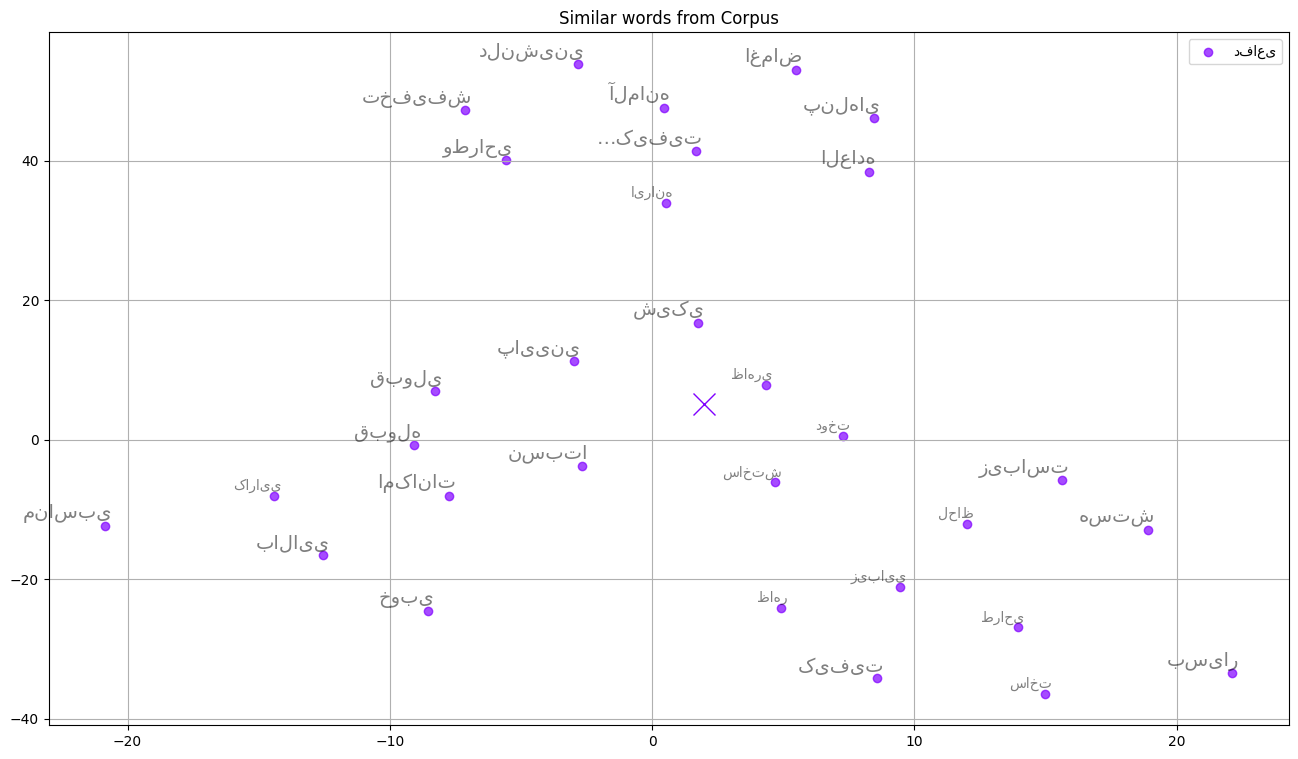

In [67]:
# Get closest words to the keys and get clusters of these words
embeddings_en_2d, word_clusters = get_cluster_embeddings(["کیفیت"])
# tSNE plot of similar words to keys
tsne_plot_similar_words(title='Similar words from Corpus',
                        labels=["دفاعی"],
                        embedding_clusters=embeddings_en_2d,
                        word_clusters=word_clusters,
                        opacity=0.7,
                        filename='similar_words.png')

In [68]:
word_clusters[0]

['ظاهر',
 'ساخت',
 'زیبایی',
 'طراحی',
 'لحاظ',
 'ساختش',
 'دوخت',
 'ایرانه',
 'کارایی',
 'ظاهری',
 'العاده',
 'تخفیفش',
 'وطراحی',
 'شیکی',
 'مناسبی',
 'پنلهای',
 'قبوله',
 'آلمانه',
 'پایینی',
 'بسیار',
 'بالایی',
 'اغماض',
 'زیباست',
 'نسبتا',
 'خوبی',
 'هستش',
 'قبولی',
 'دلنشینی',
 '…کیفیت',
 'امکانات',
 'کیفیت']

In [69]:
len(word_clusters[0])

31

In [70]:
embeddings_en_2d[0][0]

array([  4.903822, -24.144016], dtype=float32)

In [71]:
len(embeddings_en_2d[0])

31

In [72]:
tsne_word_cluster_df = pd.DataFrame(data = embeddings_en_2d[0])
tsne_word_cluster_df['name'] = word_clusters[0]

In [73]:
tsne_word_cluster_df.head()

,0,1,name
0,4.903822,-24.144016,ظاهر
1,14.963149,-36.447315,ساخت
2,9.436356,-21.065832,زیبایی
3,13.933346,-26.930304,طراحی
4,11.993731,-12.046418,لحاظ


# Clustered Points: Points that are close to each other in the t-SNE plot represent items that are similar in the original high-dimensional space. Clusters of points indicate groups of items with similar characteristics or features.
# Distance and Proximity: The distance between points in the t-SNE plot reflects their dissimilarity or similarity in the original high-dimensional space. Points that are close together are more similar, while points that are far apart are more dissimilar.
# Local and Global Structure: t-SNE aims to preserve both local and global structure, meaning that nearby points in the t-SNE plot are likely to be similar, while the overall layout of the plot captures the broader relationships between different groups of items.

In [74]:
# Save the DataFrame to a CSV file
tsne_word_cluster_df.to_csv('TSNE_Dِigikala.csv', index=False)

In [75]:
vocabs = list(w2vmodel.wv.key_to_index.keys())

In [76]:
vocabs[:10]

['خیلی',
 'داره',
 'برای',
 'استفاده',
 'کیفیت',
 'میشه',
 'خریدم',
 'نیست',
 'خوبه',
 'کردم']

In [77]:
# Generate Word2Vec embeddings for the data
embeddings = []
for word in vocabs:
    embeddings.append(np.mean([w2vmodel.wv[word]], axis=0).tolist())

In [78]:
type(embeddings[0])

list

In [79]:
embeddings_df = pd.DataFrame(data = embeddings)

In [80]:
# embeddings_df["indexes"] = vocabs
embeddings_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.031538,0.549065,1.230672,-0.558618,-0.059355,-1.005679,0.819910,0.975837,-0.211825,-1.114481,...,0.608627,-0.276306,0.690697,-0.975720,0.194980,0.760742,-0.373890,0.400330,0.620287,-0.083158
1,-0.086471,0.429173,-0.006069,0.396824,0.736023,-0.599830,0.351779,1.428590,-1.083803,-0.363369,...,0.900716,-0.442732,1.066668,-0.149255,0.636023,0.552354,0.512963,-0.244305,0.146138,0.468515
2,0.592040,0.720792,0.546540,0.030944,-0.196332,-0.340593,-0.033882,1.007241,-1.013286,-0.628802,...,-0.096908,0.513682,0.370091,-0.244267,0.410618,0.284954,0.472095,0.061644,0.723353,-0.468072
3,0.913674,1.113032,-0.070659,-0.259041,-0.433536,-0.234973,0.172847,0.173541,0.356558,-0.042979,...,-0.238300,1.265091,-0.516264,0.519102,0.455542,-0.263880,-0.792820,-0.335623,0.734411,0.759438
4,-0.860443,-0.113194,0.883020,0.843531,0.611158,-0.450239,0.308105,1.868371,-1.202552,-0.212403,...,1.074449,-0.802639,0.537771,0.129943,1.131940,0.312008,0.362682,0.413377,-0.447016,0.286289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,0.002826,0.009054,-0.000802,-0.000364,0.003367,0.003327,-0.006821,-0.008995,0.010363,-0.021882,...,-0.014781,0.010713,0.016529,-0.019675,0.006061,0.024581,-0.015547,0.015297,-0.017226,0.029029
8995,0.003113,0.049833,0.001694,0.015806,0.025805,-0.048976,0.036827,0.082444,-0.064540,0.015860,...,0.054584,0.049800,-0.007772,0.006650,0.074335,-0.009824,0.003845,-0.063423,0.021485,-0.008233
8996,0.010441,0.031217,-0.001872,0.015808,0.026125,-0.037839,0.033264,0.064794,-0.047367,0.005214,...,0.028670,0.041389,0.004536,0.002177,0.049470,-0.002933,0.006407,-0.066267,0.026911,0.001207
8997,-0.015124,-0.000801,0.008301,0.028896,0.015792,-0.044373,0.025165,0.061578,-0.033023,-0.024780,...,0.059785,0.024011,0.017340,0.030541,0.066219,0.003869,0.023332,-0.044545,-0.001222,0.001796


In [81]:
# Generate Word2Vec embeddings for the data
mean_embeddings = []
for word in vocabs:
    mean_embeddings.append(np.array([w2vmodel.wv[word]]).mean())

In [82]:
mean_embeddings[:100]

[0.012082086,
 0.13423961,
 -0.0071098674,
 -0.0073147803,
 0.022214225,
 0.04677325,
 -0.0067183143,
 0.011220877,
 0.044105433,
 -0.05012794,
 -0.07743888,
 -0.0073976475,
 0.0051756348,
 -0.033754222,
 0.00838189,
 -0.016891856,
 0.045939617,
 0.05798808,
 0.06831558,
 -0.1008423,
 -0.031208782,
 0.06440941,
 0.019836474,
 0.048334103,
 0.04678259,
 0.05776414,
 -0.037240416,
 -0.058719195,
 0.038428985,
 -0.0009012608,
 -0.023912404,
 0.019106688,
 0.08336748,
 -0.07289715,
 0.0056594755,
 -0.1548159,
 0.058224935,
 0.03424875,
 0.021887327,
 -0.07422402,
 -0.11302208,
 -0.036119822,
 0.030511683,
 -0.030279594,
 -0.07963407,
 0.03980428,
 -0.0043915776,
 0.010549735,
 0.021829259,
 -0.09949727,
 0.004494527,
 -0.029509509,
 0.00087804615,
 0.12971035,
 0.061710343,
 0.025929658,
 -0.06027101,
 -0.05724657,
 -0.029425254,
 -0.0072916923,
 0.0064787166,
 0.010144781,
 0.045501098,
 0.05058713,
 0.017214108,
 -0.0095263235,
 -0.007284511,
 -0.05605114,
 0.01680807,
 -0.006787783,
 0.

Text(0, 0.5, 'WCSS')

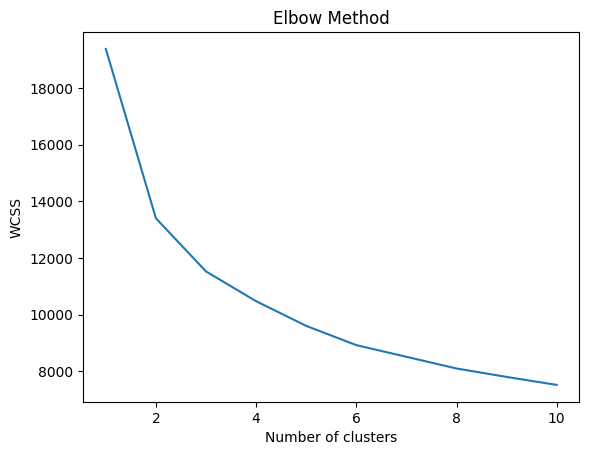

In [83]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(embeddings)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#plt.show()

In [120]:
# Cluster the documents using K-means
kmeans = KMeans(n_clusters=4, random_state=42)
text_kmeans = kmeans.fit(embeddings)
labels = kmeans.labels_
clusters = kmeans.cluster_centers_

# Print the cluster labels for each document
# for i, label in enumerate(labels):
#     print('Document', i, 'is in cluster', label)

In [121]:
# Generate Word2Vec embeddings for the data
mean_clusters = []
for center_vec in clusters:
    mean_clusters.append(center_vec.mean())

In [122]:
mean_clusters

[0.0004911331200544368,
 -0.013297339177489827,
 0.009862262372649432,
 0.0017648478197137079]

In [123]:
labels

array([1, 2, 2, ..., 0, 0, 0])

In [124]:
mean_clusters_final = []
for label in labels:
    mean_clusters_final.append(mean_clusters[label])

In [125]:
mean_clusters_final

[-0.013297339177489827,
 0.009862262372649432,
 0.009862262372649432,
 0.009862262372649432,
 -0.013297339177489827,
 0.009862262372649432,
 -0.013297339177489827,
 0.009862262372649432,
 -0.013297339177489827,
 -0.013297339177489827,
 -0.013297339177489827,
 -0.013297339177489827,
 -0.013297339177489827,
 -0.013297339177489827,
 -0.013297339177489827,
 -0.013297339177489827,
 -0.013297339177489827,
 0.009862262372649432,
 -0.013297339177489827,
 -0.013297339177489827,
 -0.013297339177489827,
 0.009862262372649432,
 -0.013297339177489827,
 -0.013297339177489827,
 -0.013297339177489827,
 0.009862262372649432,
 0.009862262372649432,
 -0.013297339177489827,
 0.009862262372649432,
 0.009862262372649432,
 0.009862262372649432,
 0.009862262372649432,
 -0.013297339177489827,
 -0.013297339177489827,
 0.009862262372649432,
 -0.013297339177489827,
 0.009862262372649432,
 0.009862262372649432,
 -0.013297339177489827,
 -0.013297339177489827,
 -0.013297339177489827,
 0.009862262372649432,
 0.001764

In [126]:
# Create a Pandas DataFrame with the data and labels
df = pd.DataFrame({'Text': vocabs, 'Label': labels,'mean_embedding': mean_embeddings, 'mean_clusters':mean_clusters_final})

# Save the DataFrame to a CSV file
df.to_csv('Kmeans_Digikala_labels.csv', index=False)

In [127]:
Kmeans_df = pd.read_csv("Kmeans_Digikala_labels.csv")
Kmeans_df

,Text,Label,mean_embedding,mean_clusters
0,خیلی,1,0.012082,-0.013297
1,داره,2,0.134240,0.009862
2,برای,2,-0.007110,0.009862
3,استفاده,2,-0.007315,0.009862
4,کیفیت,1,0.022214,-0.013297
...,...,...,...,...
8994,لایتنینگش,0,0.002091,0.000491
8995,افزایشیافته,0,0.000757,0.000491
8996,دماوند,0,0.001508,0.000491
8997,شایسته,0,-0.000229,0.000491


In [129]:
from wordcloud import WordCloud, STOPWORDS
def generate_word_cloud(df, label_col):
    # Combine all labels into a single string
    labels = ' '.join(df[label_col].values)

    # Create a word cloud object
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=800).generate(labels)
    plt.figure(figsize=(10, 10))
    # Display the word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

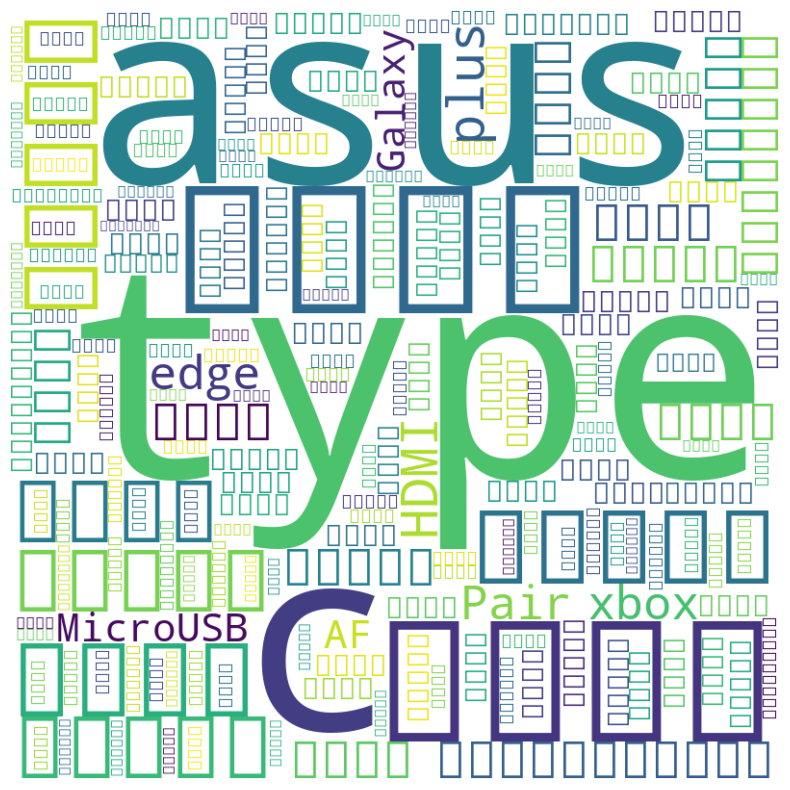

In [130]:
generate_word_cloud(Kmeans_df, 'Text')

<function matplotlib.pyplot.show(close=None, block=None)>

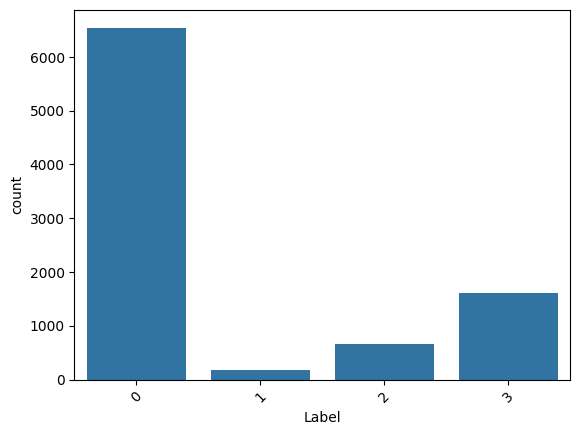

In [131]:
sns.countplot(x='Label', data=Kmeans_df)
plt.xticks(rotation=45)
plt.show

In [132]:
import pickle

# Save the model to a file
with open('kmeans_Digikala.pkl', 'wb') as file:
   pickle.dump(kmeans, file)

# END of Notebook